# Diabetes Risk Dataset

## Overview
This dataset goes over various factors such as age, gender and any pre-existing conditions, to try and predict diabetes at an early stage.
 

###  Objective
As stated in the overview, the objective of this project is to create a model which can accuratly predict diabetes as early as possible

### Dataset Source
The original untampered dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.


## Dataset Exploration

In [190]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

In [111]:
#Load Dataset file
df = pd.read_csv('Data/diabetes_data_upload.csv')
#Quick view general data (Data will now be saved into a DataFrame)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [112]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
#We can see that the Dataset has 520 rows and 17 columns

The dataset has 520 rows and 17 columns


In [113]:
#We will now show the meanings of these columns
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [114]:
#Print Values appropriate to column
for i in df.columns:
    if len(df[i].unique()) < 10:
        print(f'{i} has {len(df[i].unique())} unique values, They are: {df[i].unique()}')

Gender has 2 unique values, They are: ['Male' 'Female']
Polyuria has 2 unique values, They are: ['No' 'Yes']
Polydipsia has 2 unique values, They are: ['Yes' 'No']
sudden weight loss has 2 unique values, They are: ['No' 'Yes']
weakness has 2 unique values, They are: ['Yes' 'No']
Polyphagia has 2 unique values, They are: ['No' 'Yes']
Genital thrush has 2 unique values, They are: ['No' 'Yes']
visual blurring has 2 unique values, They are: ['No' 'Yes']
Itching has 2 unique values, They are: ['Yes' 'No']
Irritability has 2 unique values, They are: ['No' 'Yes']
delayed healing has 2 unique values, They are: ['Yes' 'No']
partial paresis has 2 unique values, They are: ['No' 'Yes']
muscle stiffness has 2 unique values, They are: ['Yes' 'No']
Alopecia has 2 unique values, They are: ['Yes' 'No']
Obesity has 2 unique values, They are: ['Yes' 'No']
class has 2 unique values, They are: ['Positive' 'Negative']


In [115]:
#Number of people in Dataset <= age 45
fortyFive = df[df.Age<=45].shape[0]
#Show Data regarding above
print('% of people age 45 and under is ', round(fortyFive/df.shape[0],2))

#Number of people in Dataset <= age 55
fiftyFive = df[df.Age<=55].shape[0]
#Show Data regarding above
print('% of people age 55 and under is ', round(fiftyFive/df.shape[0],2))

#Number of people in Dataset <= age 75
seventyFive = df[df.Age<=75].shape[0]
#Show Data regarding above
print('% of people age 75 and under is ', round(seventyFive/df.shape[0],2))

% of people age 45 and under is  0.44
% of people age 55 and under is  0.73
% of people age 75 and under is  0.99


In [116]:
#Class Distribution
df['class'].value_counts()
#We can see that there are 320 Positive cases and
#200 negative cases within the Dataset

Positive    320
Negative    200
Name: class, dtype: int64

In [117]:
df['Gender'].value_counts()
#We can see that the majority of Patiens within the Dataset are males

Male      328
Female    192
Name: Gender, dtype: int64

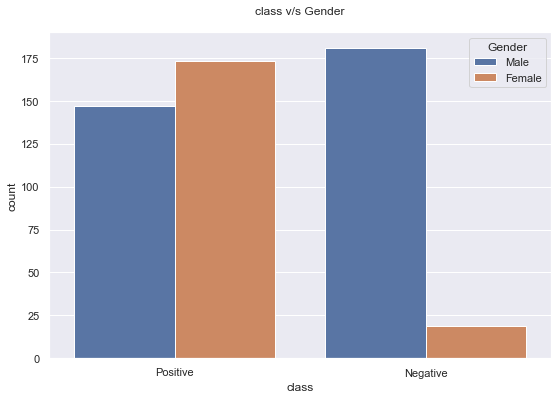

In [118]:
#Visualise data
sns.set_style('darkgrid')
sns.set_palette('Set2')

#Make Copy of Dataset
dfC = df.copy()

#Set Height and width of graph (w,h)
sns.set(rc={'figure.figsize':(9,6)})

#Set information to be plotted
sns.countplot(data=dfC, x='class', hue='Gender')
plt.title('class v/s Gender\n')
plt.show()


In [119]:
df.groupby(['Gender','class']).mean()

Age
Gender class              
Female Negative  46.315789
       Positive  47.109827
Male   Negative  46.364641
       Positive  51.380952

In [120]:
#Check for Missing Values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [121]:
#Compute Mean value of Age (verify there are no missing values)
age_mean = round(df['Age'].mean())
#Assign mean to potentially missing values
df['Age'].fillna(age_mean, inplace = True)
print(age_mean)

48


# Support Vector Machine Model

In [122]:
#First we need to replace string values into usable values
df = df.replace({'Yes': 1, 'No' : 0})
df = df.replace({'Male': 1, 'Female': 0})
df = df.replace({'Positive': 1, 'Negative': 0})
#Store dataframe in X apart from 'class' Column
X = df.drop('class', axis=1)
#Only 'class' column being stored in y
y= df['class']

In [164]:
#Make 20% of data for testing
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [165]:
svclassifier = SVC(kernel='linear')
#Use the 'fit' method to train the algorithm
svclassifier.fit(X_train_svm, y_train_svm)

SVC(kernel='linear')

In [168]:
#Make a prediction
y_pred_svm = svclassifier.predict(X_test_svm)
#print(y_pred)

In [169]:
#Dictionary & DF creation to check correct predictions

dic_svm = {'Actual': actual,
         'Prediction': y_pred_svm,
         'correct_prediction':0
         }
result = pd.DataFrame(dic_svm)

#Update correct_prediction values to 1 if the prediction is correct
def checkCorrectSvm(x,y):
    if x==y:
        return 1
    else:
        return 0
result['correct_prediction'] = result.apply(lambda x: checkCorrect(x.Actual, x.Prediction), axis=1)

In [171]:
#result[result.correct_prediction==1]
#result[result.correct_prediction==0]
#print(f'The model Accuracy on Test Data is {len(result[result.correct_prediction==1])/len(result)}')

In [202]:
#Evaluate the algorithm
#print(confusion_matrix(y_test,y_pred))
#We will generate a classification report to view our results
print(classification_report(y_test_svm,y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



In [211]:
#We will now print a more comprehendable accuracy score

#Precision Score
print("Precision score: {}".format(precision_score(y_test_svm,y_pred_svm)))

#Recall Score
print("Recall score: {}".format(recall_score(y_test_svm,y_pred_svm)))

#F1 Score
print("F1 score: {}".format(f1_score(y_test_svm,y_pred_svm)))

Precision score: 0.9538461538461539
Recall score: 0.96875
F1 score: 0.9612403100775193


### Support Vector Machine Conclusion
I will break down the above report into each classifier for clarity.

#### Precision Score
The 'Precision' Score tells us which percent of our predictions were correct. The formula for this classifier comes down to the ratio of true positives to the sum of True & False positives.
Precision = TP/(TP+FP). As we can see from the above code, our precision code sits at around 95% accuracy.

#### Recall Score
The 'Recall' Score tells us the percent of positive cases we were able to catch. The formula for this classifier revolves around the ratio of TP to the sum of TP and FN.
Recall = TP/(TP+FN). As we can see from the above code, our Recall code sits at around 96% accuracy.

#### F1 Score
The 'F1' Score tells us the percent of positive predictions were correct. This score can also be seen as the mean between the Precision and Recall scores. The formula for this classifier is as follows:
F1 = 2*(Recall * Precision)/(Recall + Precision). Our F1 Score comes in at 0.96.

## Logistic Regression Model

In [136]:
#Store dataframe in X apart from 'class' Column
X = df.drop('class', axis=1)
#Only 'class' column being stored in y
y= df['class']

In [176]:
#Split data into training & testing
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X,y, test_size=0.2, random_state = 0)

In [177]:
#Normalize the data (Reduce nosie)
normalized_X_train = preprocessing.normalize(X_train_lg)
normalized_X_test = preprocessing.normalize(X_test_lg)

In [178]:
#We will now fit the model
lg_model = LogisticRegression(solver='lbfgs', max_iter=3000)
lg_model.fit(X_train_lg,y_train_lg)

LogisticRegression(max_iter=3000)

In [185]:
#We will now make a predictions based on the fitted model
y_pred_lg = lg_model.predict(X_test_lg)
actual = y_test_lg

In [186]:
#Dictionary & DF creation to check correct predictions

dic_lg = {'Actual': actual,
         'Prediction': y_pred,
         'correct_prediction':0
         }
result = pd.DataFrame(dic_lg)

#Update correct_prediction values to 1 if the prediction is correct
def checkCorrectLg(x,y):
    if x==y:
        return 1
    else:
        return 0
result['correct_prediction'] = result.apply(lambda x: checkCorrect(x.Actual, x.Prediction), axis=1)

In [206]:
#We will generate a classification report to view our results
print(classification_report(y_test_lg,y_pred_lg))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



In [187]:
#result[result.correct_prediction==1]
#result[result.correct_prediction==0]

print(f'The model Accuracy on Test Data is {len(result[result.correct_prediction==1])/len(result)}')

#Precision Score
print("Precision score: {}".format(precision_score(y_test_lg,y_pred_lg)))

#Recall Score
print("Recall score: {}".format(recall_score(y_test_lg,y_pred_lg)))

#F1 Score
print("F1 score: {}".format(f1_score(y_test_lg,y_pred_lg)))


The model Accuracy on Test Data is 0.9519230769230769
Precision score: 0.9538461538461539
Recall score: 0.96875
F1 score: 0.9612403100775193


### Logistic Regression Conclusion
Checking the accuracy scores compared to our Support Vector Machine model, it appears that the results remain the same. This applies to the Precision score, Recall score & F1 score.

## Naive Bayes Model

In [188]:
#Store dataframe in X apart from 'class' Column
X = df.drop('class', axis=1)
#Only 'class' column being stored in y
y= df['class']

In [189]:
#Split Dataset into training & Test set
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X,y, test_size=0.2, random_state=0)

In [199]:
#Creating Naive Bayes Object
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_nb,y_train_nb)

GaussianNB()

In [207]:
#Predict Test set
y_pred_nb = classifier_nb.predict(X_test_nb)
#NB Confusion Matrix
nb_matrix = confusion_matrix(y_test_nb,y_pred_nb)
#Display Confusion Matrix
#print(nb_matrix)
#We will generate a classification report to view our results
print(classification_report(y_test_nb,y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        40
           1       0.91      0.98      0.95        64

    accuracy                           0.93       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.94      0.93      0.93       104



In [210]:
#We will now print a more comprehendable accuracy score


#Precision Score
print("Precision score: {}".format(precision_score(y_test_nb,y_pred_nb)))

#Recall Score
print("Recall score: {}".format(recall_score(y_test_nb,y_pred_nb)))

#F1 Score
print("F1 score: {}".format(f1_score(y_test_nb,y_pred_nb)))

The model Accuracy on Test Data is 0.9519230769230769
Precision score: 0.9130434782608695
Recall score: 0.984375
F1 score: 0.9473684210526315


### Naive Bayes Conclusion
Just like the previous models, I will go into more depth about the various clasifiers below.

#### Precision Score
The 'Precision' Score in the Naive Bayes model comes in at 91%, this is the lowest accuracy in comparison to the other 2 models used.

#### Recall Score
The 'Recall' Score in this model comes in at 98%. Contrary to the Precision Score, this is the highest Accuracy of Recall in comparison to the other 2 models.

#### F1 Score
The 'F1' Score in this model scores a 0.94. This is the lowest score compared to the other 2 models used.

## Model Efficiency Conclusion

### Models Used
I have used a total of 3 models for this project, these models are:

1.Support Vector Machine Model.

2.Logistic Regression Model.

3.Naive Bayes Model.

### Most efficient model
From my research I have noticed that the Support Vector Machine Model & the Logistic Regression Model share the same accuracy, perhaps with more fine-tuning, there will be a superior model that best fits this Dataset.

While 'Naive Bayes' had the highest Recall score out of the bunch, the Precision score & F1 score were lacking behind the other models.


# Improvement of the Support Vector Machine Model
Now that we have established the most efficient models for this particular project, I will be fine-tuning one of them to try and improve upon the findings that we had found previously. The model I will be tuning will be the Support Vector Machine Model, as I feel that there are more adjustments that can be made for this specific model.

Previous Accuracy Scores:

Precision Score: 0.9538461538461539

Recall Score: 0.96875

F1 Score: 0.9612403100775193